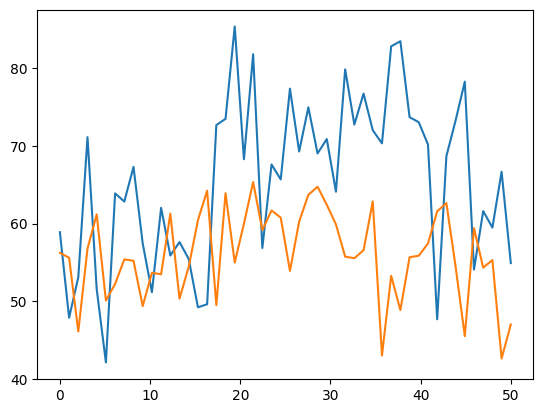

In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def createLiePulse():
    blank=np.linspace(55,50,50)
    pulse=70+15*np.sin(blank+np.random.normal(0,1,50))
    pulse+=np.random.normal(-5,5,50)
    #plt.plot(np.linspace(0,50),pulse)
    # print(np.std(pulse), np.var(pulse))
    return pulse


def createTruthPulse():
    blank=np.linspace(55,50,50)
    pulse=60+5*np.sin(blank+np.random.normal(0,1,50))
    pulse+=np.random.normal(-5,5,50)
    #print(pulse)
    #plt.plot(np.linspace(0,50),pulse)
    return pulse

plt.plot(np.linspace(0,50),createLiePulse())
plt.plot(np.linspace(0,50),createTruthPulse())

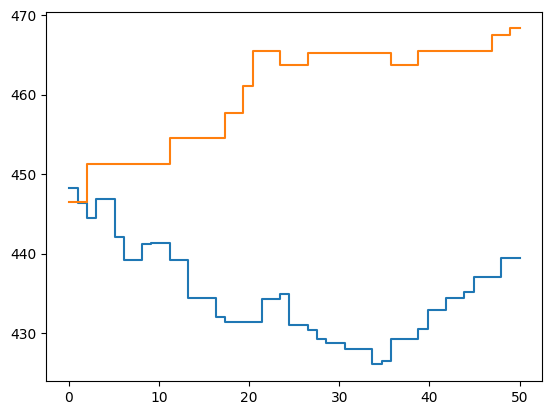

In [438]:
def createGSRLie():
    blank=np.ones(50)
    blank[0]=450+np.random.uniform(-15,15)
    for i in range(1,35):
        inc=np.random.uniform(0,1)
        if inc>0.6:
            blank[i]=blank[i-1]-np.random.uniform(0,5)
        elif inc<0.6 and inc>0.1:
            blank[i]=blank[i-1]
        else:
            blank[i]=blank[i-1]+np.random.uniform(0,3)

    for i in range(35,50):
        inc=np.random.uniform(0,1)
        if inc>0.5:
            blank[i]=blank[i-1]+np.random.uniform(0,5)
        elif inc<0.5 and inc>0.1:
            blank[i]=blank[i-1]
        else:
            blank[i]=blank[i-1]-np.random.uniform(0,3)
    #plt.plot(np.linspace(0,len(blank),len(blank)),blank)
    #plt.step(np.linspace(0,len(blank),len(blank)),blank)
    return blank
    
def createGSRTruth():
    blank=np.ones(50)
    blank[0]=450+np.random.uniform(-15,15)
    for i in range(1,50):
        inc=np.random.uniform(0,1)
        if inc>0.9:
            blank[i]=blank[i-1]+np.random.uniform(0,5)
        elif inc<0.9 and inc>0.1:
            blank[i]=blank[i-1]
        else:
            blank[i]=blank[i-1]-np.random.uniform(0,3)

    
    #plt.plot(np.linspace(0,len(blank),len(blank)),blank)
    #plt.step(np.linspace(0,len(blank),len(blank)),blank)
    return blank
    

plt.step(np.linspace(0,len(createGSRLie()),len(createGSRLie())),createGSRLie())
plt.step(np.linspace(0,len(createGSRTruth()),len(createGSRTruth())),createGSRTruth())

In [457]:
def createFullDataSet():
    df = pd.DataFrame()
    GSR=[createGSRLie()]
    Pulse=[createLiePulse()]
    Condition=["lie"]
    for i in range(1,9):
        GSR.append(createGSRTruth())
        Pulse.append(createTruthPulse())
        Condition.append("truth")
    GSR.append(createGSRLie())
    Pulse.append(createLiePulse())
    Condition.append("lie")

    df["GSR"]=GSR
    df["Pulse"]=Pulse
    df["Condition"]=Condition
    df["ID"]=np.linspace(0,9,10)
    return df
    

createFullDataSet()
    

,GSR,Pulse,Condition,ID
0,"[445.2720923742035, 445.2720923742035, 445.272...","[70.0660142804987, 37.914274138016516, 59.4277...",lie,0.0
1,"[451.4809657283564, 451.4809657283564, 449.554...","[50.793897466495, 42.08609326230991, 42.246248...",truth,1.0
2,"[451.1505144250923, 451.1505144250923, 451.150...","[60.74874726812052, 55.32949222003353, 54.1424...",truth,2.0
3,"[436.5071210131571, 436.5071210131571, 436.507...","[47.880865400390924, 45.10956406612701, 53.607...",truth,3.0
4,"[451.2280881700137, 451.2280881700137, 451.228...","[54.499139279933466, 52.36782125285889, 54.133...",truth,4.0
5,"[457.6543678599764, 459.3923912575836, 457.061...","[52.202230177867676, 41.26896644291651, 54.219...",truth,5.0
6,"[455.9627225471606, 453.8173401212214, 453.817...","[55.45124947677337, 44.15677533768297, 54.8759...",truth,6.0
7,"[455.0894585474807, 455.0894585474807, 457.604...","[46.102660048623335, 57.410648514710715, 51.34...",truth,7.0
8,"[435.33652452097573, 435.33652452097573, 435.3...","[43.89901576803605, 45.779744865990565, 50.632...",truth,8.0
9,"[442.48113461730003, 439.28770273825324, 437.3...","[64.13448556652641, 49.014297658016, 62.646753...",lie,9.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from  itertools import chain
df=createFullDataSet()
vals = df.GSR.str.len()
df1 = pd.DataFrame({
        "ID": np.repeat(df.ID.values,vals),
        "GSR": list(chain.from_iterable(df.GSR)),
        "Pulse": list(chain.from_iterable(df.Pulse)),
        "Condition": np.repeat(df.Condition.values,vals)})
df1 = df1.reindex(df.columns, axis=1)
df1
# print (df1)

df1.groupby("ID")
df1
X=df1[["GSR","Pulse"]].values
Y=df1[["Condition","ID"]].values
X_std = StandardScaler().fit_transform(X)

print('Covariance matrix \n') 
cov_mat= np.cov(X_std, rowvar=False) 
cov_mat
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)



In [ ]:
df=createFullDataSet()
npdf=df.drop(["Condition","ID"],axis=1).to_numpy()
data_2d = np.array([features_2d.flatten() for features_2d in data])
data_2d
pca = PCA(n_components=2)
pca.fit(data_2d)
data_pca = pca.transform(data_2d)
print("original shape:   ", data_2d.shape) ##(69,2640*7680)
print("transformed shape:", data_pca.shape)
np.array([[[23,2],[2,3],[2,3]],[[2,3],[2,3],[2,3]]]).shape

npdf.shape
npdf

<Axes: >

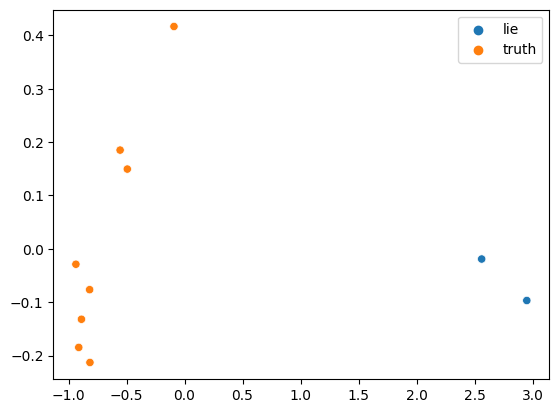

In [462]:
df=createFullDataSet()
GSRVar=[]
PulseVar=[]
for i in df["GSR"]:
    GSRVar.append(np.var(i))
for i in df["Pulse"]:
    PulseVar.append(np.var(i))

GSRVar
PulseVar
df["GSRVar"]=GSRVar
df["PulseVar"]=PulseVar

df2=df.drop(["GSR","Pulse"],axis=1)
df2

X=df2[["GSRVar","PulseVar"]].values
Y=df2[["Condition","ID"]].values
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], hue=Y[:,0])
